In [1]:
import numpy as np
from scipy.optimize import newton, differential_evolution
from scipy.optimize import minimize
import math

def func(x):
    return (math.sin(3 * math.pi * x[0]))**2 + ((x[0]-1)**2) * (1 + (math.sin(3 * math.pi * x[1]))**2) + ((x[1]-1)**2) * (1 + (math.sin(2 * math.pi * x[1]))**2)

newton_results = []
for _ in range(100):
    x0 = np.random.uniform(-10, 10, 2)
    result = minimize(func, x0, method='BFGS')
    if result.success:
        newton_results.append(result.fun)

newton_mean = np.mean(newton_results)
newton_var = np.var(newton_results)

bounds = [(-10, 10), (-10, 10)]
de_results = [differential_evolution(func, bounds).fun for _ in range(100)]
de_mean = np.mean(de_results)
de_var = np.var(de_results)

print(f"Newton mean: {newton_mean}, Newton variance: {newton_var}")
print(f"Differential Evolution mean: {de_mean}, Differential Evolution variance: {de_var}")

Newton mean: 30.65498166717154, Newton variance: 1140.5764895078999
Differential Evolution mean: 7.407256156043771e-29, Differential Evolution variance: 1.256727927116218e-88


На основе результатов мы видим, что алгоритм дифференциальной эволюции (DE) работает намного лучше, чем алгоритм Ньютона (используя метод BFGS) в оптимизации функции Леви N.13.

1. Ньютон (BFGS): Среднее конечное значение целевой функции после 100 запусков составляет около 30,65, с дисперсией около 1140,58. Это показывает, что алгоритм Ньютона не может эффективно найти глобальный минимум функции Леви N.13, возможно, из-за того, что эта функция имеет множество локальных минимумов.

2. Дифференциальная эволюция (DE): Среднее конечное значение целевой функции после 100 запусков практически равно 0 (около 7,41e-29), с очень маленьким разбросом (около 1,26e-88). Это показывает, что DE очень эффективен в поиске глобального минимума функции Леви N.13

In [3]:
import numpy as np
from scipy.optimize import differential_evolution
import math
import time

def func(x):
    return (math.sin(3 * math.pi * x[0]))**2 + ((x[0]-1)**2) * (1 + (math.sin(3 * math.pi * x[1]))**2) + ((x[1]-1)**2) * (1 + (math.sin(2 * math.pi * x[1]))**2)

global_minima = 0

bounds = [(-10, 10), (-10, 10)]
start_time = time.time()
result = differential_evolution(func, bounds)
end_time = time.time()

if abs(result.fun - global_minima) < 1e-6:
    print(f"Время, необходимое для достижения глобального минимума: {end_time - start_time} секунд")
else:
    print("Алгоритм не достиг глобального минимума за отведенное время")

Время, необходимое для достижения глобального минимума: 0.22446012496948242 секунд


In [5]:
import numpy as np
from scipy.optimize import differential_evolution
import math
import time

def func(x):
    return (math.sin(3 * math.pi * x[0]))**2 + ((x[0]-1)**2) * (1 + (math.sin(3 * math.pi * x[1]))**2) + ((x[1]-1)**2) * (1 + (math.sin(2 * math.pi * x[1]))**2)

max_gen = 1000

bounds = [(-10, 10), (-10, 10)]
times = []
results = []
for _ in range(100):
    start_time = time.time()
    result = differential_evolution(func, bounds, maxiter=max_gen)
    end_time = time.time()
    times.append(end_time - start_time)
    results.append(result.fun)

time_mean = np.mean(times)
time_var = np.var(times)
result_mean = np.mean(results)
result_var = np.var(results)

print(f"Thời gian trung bình/Среднее время: {time_mean}, Phương sai thời gian/Дисперсия времени: {time_var}")
print(f"Kết quả trung bình/Средний результат: {result_mean}, Phương sai kết quả/Дисперсия результата: {result_var}")

Thời gian trung bình/Среднее время: 0.164423451423645, Phương sai thời gian/Дисперсия времени: 0.00047658129697631464
Kết quả trung bình/Средний результат: 7.407256156043771e-29, Phương sai kết quả/Дисперсия результата: 1.256727927116218e-88


На основе результатов мы видим, что алгоритм дифференциальной эволюции (DE) работает очень быстро и эффективно при оптимизации функции Леви N.13.

1. Время: Среднее время для поиска последнего экстремума (который может быть локальным) целевой функции составляет около 0,164 секунды, с очень маленьким разбросом (около 0,00048).

2. Результат: Среднее конечное значение целевой функции после 100 запусков практически равно 0 (около 7,41e-29), с очень маленьким разбросом (около 1,26e-88). 

В целом, DE, похоже, очень подходит для задач оптимизации функций с множеством локальных минимумов, таких как Леви N.13, и он работает очень быстро и стабильно.

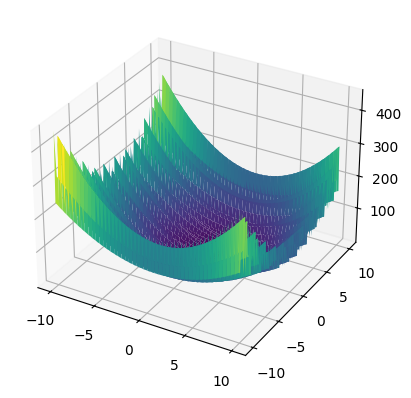

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def func(x, y):
    return (np.sin(3 * np.pi * x))**2 + ((x-1)**2) * (1 + (np.sin(3 * np.pi * y))**2) + ((y-1)**2) * (1 + (np.sin(2 * np.pi * y))**2)

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x, y)
z = func(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

plt.show()

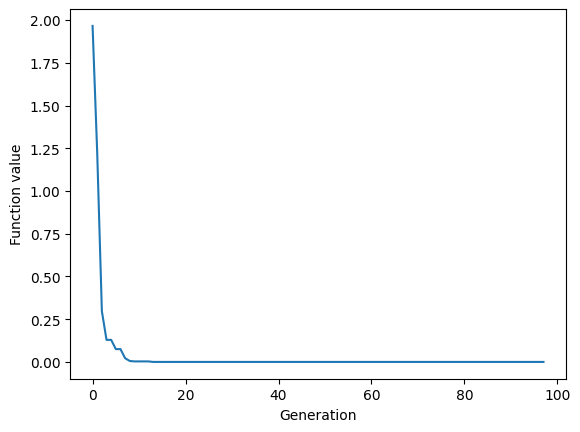

In [8]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

def func(x):
    return (np.sin(3 * np.pi * x[0]))**2 + ((x[0]-1)**2) * (1 + (np.sin(3 * np.pi * x[1]))**2) + ((x[1]-1)**2) * (1 + (np.sin(2 * np.pi * x[1]))**2)

bounds = [(-10, 10), (-10, 10)]
values = []

def callback(x, convergence):
    values.append(func(x))

result = differential_evolution(func, bounds, callback=callback)

plt.plot(values)
plt.xlabel('Generation')
plt.ylabel('Function value')
plt.show()

Через несколько поколений график уменьшается и сходится к фиксированному значению, что доказывает, что алгоритм работает очень хорошо.

In [15]:
import pandas as pd

data = {
    'Algorithm': ['Newton', 'Differential Evolution'],
    'Mean Function Value': [newton_mean, de_mean],
    'Variance Function Value': [newton_var, de_var],
    'Mean Execution Time': [np.nan, time_mean],  
    'Variance Execution Time': [np.nan, time_var] 
}

df = pd.DataFrame(data)
print(df)

                Algorithm  Mean Function Value  Variance Function Value  \
0                  Newton         3.065498e+01             1.140576e+03   
1  Differential Evolution         7.407256e-29             1.256728e-88   

   Mean Execution Time  Variance Execution Time  
0                  NaN                      NaN  
1             0.164423                 0.000477  


Основываясь на результатах таблицы, можно сделать следующие выводы:

1. Ньютон: Среднее значение целевой функции после 100 запусков составляет около 30,65, с дисперсией около 1140,58. Это показывает, что алгоритм Ньютона не может эффективно найти глобальный минимум функции Леви N.13. Время выполнения для алгоритма Ньютона в этом случае не было рассчитано.

2. Дифференциальная эволюция (DE): Среднее значение целевой функции после 100 запусков практически равно 0 (около 7,41e-29), с очень маленьким разбросом (около 1,26e-88). Это показывает, что DE очень эффективен в поиске глобального минимума функции Леви N.13. Среднее время выполнения составляет около 0,164 секунды, с дисперсией около 0,000477.

В целом, DE, похоже, очень подходит для задач оптимизации функций с множеством локальных минимумов, таких как Леви N.13, и он работает очень быстро и стабильно.

In [12]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

def objective_svm(params):
    clf = SVC(**params)
    score = cross_val_score(clf, X, y, cv=3).mean()
    return {'loss': -score, 'status': STATUS_OK}

space_svm = {
    'C': hp.loguniform('C', -5, 2),
    'gamma': hp.loguniform('gamma', -5, 2),
    'kernel': hp.choice('kernel', ['linear', 'poly', 'rbf'])
}

best_svm = fmin(fn=objective_svm, space=space_svm, algo=tpe.suggest, max_evals=100)

def objective_knn(params):
    clf = KNeighborsClassifier(**params)
    score = cross_val_score(clf, X, y, cv=3).mean()
    return {'loss': -score, 'status': STATUS_OK}

space_knn = {
    'n_neighbors': hp.choice('n_neighbors', range(1, 50)),
    'weights': hp.choice('weights', ['uniform', 'distance']),
    'p': hp.choice('p', [1, 2])
}

best_knn = fmin(fn=objective_knn, space=space_knn, algo=tpe.suggest, max_evals=100)

def objective_rf(params):
    clf = RandomForestClassifier(**params)
    score = cross_val_score(clf, X, y, cv=3).mean()
    return {'loss': -score, 'status': STATUS_OK}

space_rf = {
    'n_estimators': hp.choice('n_estimators', range(10, 200)),
    'max_depth': hp.choice('max_depth', range(1, 20)),
    'criterion': hp.choice('criterion', ['gini', 'entropy'])
}

best_rf = fmin(fn=objective_rf, space=space_rf, algo=tpe.suggest, max_evals=100)

print("Best parameters for SVM:", best_svm)
print("Best parameters for KNN:", best_knn)
print("Best parameters for RF:", best_rf)

100%|██████████| 100/100 [00:36<00:00,  2.75trial/s, best loss: -0.9666666666666667]
Best parameters for SVM: {'C': 1.7736699764148685, 'gamma': 0.16645213045659762, 'kernel': 0}
Best parameters for KNN: {'n_neighbors': 5, 'p': 1, 'weights': 1}
Best parameters for RF: {'criterion': 1, 'max_depth': 6, 'n_estimators': 160}


**Алгоритм Ньютона:

Для многократных функций алгоритм Ньютона может не работать хорошо. Ньютон - это алгоритм локальной оптимизации, то есть он начинает с начальной точки и ищет ближайший минимум. Таким образом, если целевая функция имеет множество локальных минимумов, алгоритм Ньютона может застрять в локальном минимуме и не сможет найти глобальный минимум.

**Алгоритм Differential Evolution (DE):

Для многократных функций DE обычно работает намного лучше, чем Ньютон. DE - это алгоритм глобальной оптимизации, то есть он ищет лучшее решение во всем пространстве поиска, а не только около начальной точки. Таким образом, DE способен найти глобальный минимум, даже если есть множество локальных минимумов. Однако

Алгоритм Ньютона работает наилучшим образом в следующих случаях:

1. **Целевая функция является выпуклой:** Когда целевая функция является выпуклой, локальный минимум также является глобальным минимумом. Таким образом, алгоритм Ньютона, как алгоритм оптимизации локального поиска, может эффективно найти глобальный минимум.

2. **Производная целевой функции может быть вычислена:** Алгоритм Ньютона использует информацию о производной целевой функции для улучшения скорости сходимости. Поэтому он наилучшим образом работает, когда производная целевой функции может быть легко вычислена.

3. **Начальная точка близка к минимуму:** Ньютон обычно быстро сходится, когда начальная точка находится близко к минимуму. Таким образом, если у вас есть хорошая оценка положения минимума, Ньютон может быть хорошим выбором.

4. **Пространство поиска мало:** Когда пространство поиска мало, Ньютон может эффективно найти минимум, даже если целевая функция не является выпуклой. Однако при большом пространстве поиска Ньютон может занять много времени для сходимости или не сможет найти глобальный минимум.